In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
estimate = pd.read_csv("Estimar_UH2020.txt", sep = "|")

In [5]:
data = pd.read_csv("Modelar_UH2020.txt", sep = "|")

In [6]:
data.CLASE.unique()

array(['RESIDENTIAL', 'INDUSTRIAL', 'PUBLIC', 'OFFICE', 'OTHER', 'RETAIL',
       'AGRICULTURE'], dtype=object)

In [7]:
data.head(10)

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000e+00,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
1,F9D04BF6D037F8FB,2189757160,165463267,5.879611e-05,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
2,B89D5711AFF8C423,2240147335,165690752,0.000000e+00,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
3,1C3478AC1522E7E4,2227146459,165934099,0.000000e+00,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4,4D12AA5009064345,2212350459,165681791,0.000000e+00,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL
5,3E74975BD3F67ADE,2203466180,165762700,0.000000e+00,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,...,8827.104856,104.511247,0.466688,0.070373,0.063454,0.901678,1992,4.0,5,RESIDENTIAL
6,200CB7A318D959DA,2141448290,165496766,0.000000e+00,274.999353,416.001074,561.002997,706.001086,862.001343,1040.000391,...,7285.159019,373.432985,0.251622,0.029647,0.022728,0.766600,1982,1.0,4,RESIDENTIAL
7,80E74C603F31D41C,2212938608,165575238,1.308316e-10,405.999329,561.998108,694.002716,832.001648,969.999817,1115.003906,...,8126.684713,489.776545,0.349491,0.025246,0.028265,1.119589,1952,7.0,4,RESIDENTIAL
8,2FC79F1B7379EC1F,2160794349,165672907,3.997917e-05,396.000687,530.996887,637.001221,735.997009,834.503479,946.001526,...,7122.145471,116.391550,0.523862,0.063012,0.071429,1.133571,1970,1.0,4,RESIDENTIAL
9,A4A6D078FB1079E5,2267210836,165899063,1.098887e-03,454.999338,573.005005,668.002612,752.999573,853.000122,1005.999158,...,5997.459077,333.617230,0.860099,0.046252,0.055740,1.205122,1990,1.0,6,INDUSTRIAL


## Dataset description
Los ficheros contienen un total 55 variables: las 3 primeras de ellas relativas a la identificación de los registros y las 8 últimas variables son distintas referencias geométricas y relativas al entorno (geometría del edificio, métricas geométricas generadas automáticamente -GEOM-, metros cuadrados, año construcción y nº de plantas de los edificios del entorno).


Las imágenes satelitales se han tratado y se ha extraído información de 4 canales (R, G, B y NIR), correspondientes a las bandas de color rojo, verde y azul, y el infrarrojo cercano. El valor mostrado corresponde a la intensidad por deciles en cada imagen. Estas variables empiezan con la letra “Q”.


### Sobre el reto
Los datos representan las características de un grupo de referencias catastrales de la zona de Madrid.  
El objetivo es predecir el uso de cada registro propuesto. Es un problema de clasificación multietiqueta: hay 6 categorías no balanceadas. 
Se presentan 2 conjuntos de datos: “Modelar…” contiene 103.230 registros con 56 variables incluyendo la variable objetivo y “Estimar…” contiene 5.618 registros con 55 variables. 
Se permite el enriquecimiento de datos, siempre y cuando se cumplan que los datos sean públicos, accesibles y legales.

### Las variables 
- La referencia catastral está ofuscada por lo que no es consultable, solo es válida como identificador de registro.  
- La información de longitud-latitud ha sido escalada y desplazada aleatoriamente (manteniendo la relación de posición con el resto de puntos). 
- El principal grupo de variables es información sobre los canales de color R-G-B e infrarrojo de las imágenes tomadas por satélite. Hay 11 variables extraídas de cada uno de estos canales, que representan el valor o densidad en cada decil.  
  - Así, la variable **Q_R_4_0_0** representa el valor para el canal Red en el decil 0, 
  - la variable **Q_G_3_0_8** representa el valor para el canal Green del decil 8 etc. 
  - La identificación “**Q_NIR…**” representa el canal en infrarrojo. 
- A continuación, hay 1 variable de área y 4 variables que condensan información de tipo geométrico sobre la parcela/registro.  
  - El **MAXBUILDINGFLOOR** se refiere a la altura máxima de los registros colindantes, no al propio registro. El año de construcción también se refiere al entorno. 
  - Por último, se presenta una variable categórica representativa de la calidad según los datos de catastro (menor valor, menor calidad). 


### La entrega intermedia 
Se habilita un día **(10 de marzo)** para presentar una “entrega intermedia”, en el que los equipos podrán enviar 2 “ficheros_respuestas” distintos (es decir, la predicción para los registros de “Estimar…”). No hay que enviar script ni presentación.  La Organización, al día siguiente, comunicará la métrica y la posición relativa del equipo en el total de la competición. Este mecanismo es optativo y no será considerado como una entrega oficial evaluable por el jurado local, tan solo será un medio para retroalimentar y mejorar vuestro trabajo. 

## Evaluación: 
#### SE VALORARÁ
- **La calidad y la técnica utilizada para generar un modelo.**
Se analizará la técnica analítica utilizada y se compararán objetivamente los valores reales frente a los valores predichos por el modelo. La métrica para maximizar es la “precisión”.
- **Comunicación.**
Que la documentación interna aportada (códigos, comentarios) esté correctamente expresada y estructurada, y sea reproducible. En la Fase de Presentación de mejores trabajos, el Jurado tendrá en cuenta que el modelado y los resultados obtenidos se transmitan de forma clara y concisa.

In [8]:
data.describe()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,1.032300e+05,1.032300e+05,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103210.000000
mean,2.208858e+09,1.655955e+08,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,...,2328.363095,2738.622278,7748.293927,441.123610,0.563343,0.062482,0.061855,1.074327,1972.552436,3.766709
std,2.751723e+07,2.040199e+05,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,...,295.852549,365.812714,2795.775635,1869.705189,0.174141,0.042849,0.042295,0.541156,22.335987,2.944896
min,2.120751e+09,1.650957e+08,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,...,1861.006226,2172.992676,4085.049076,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000
25%,2.194235e+09,1.654515e+08,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,...,2126.002441,2478.998193,6051.309064,97.477454,0.455183,0.038255,0.038153,0.801352,1960.000000,1.000000
50%,2.205985e+09,1.655907e+08,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,...,2313.999268,2688.000000,6798.207198,171.554907,0.536336,0.055802,0.055036,0.997175,1972.000000,4.000000
75%,2.224105e+09,1.657138e+08,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,...,2491.004199,2940.996704,8033.479864,343.563671,0.674723,0.078477,0.078064,1.223456,1989.000000,5.000000
max,2.287300e+09,1.665046e+08,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,...,3750.997559,4614.998535,15848.608811,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000


In [9]:
# Distribucion de las clases en los datos
d = data[["X","CLASE"]].groupby("CLASE").count()
class_percentage = d/d["X"].sum()*100

In [10]:
d

,X
CLASE,
AGRICULTURE,338
INDUSTRIAL,4490
OFFICE,1828
OTHER,1332
PUBLIC,2976
RESIDENTIAL,90173
RETAIL,2093


<BarContainer object of 7 artists>

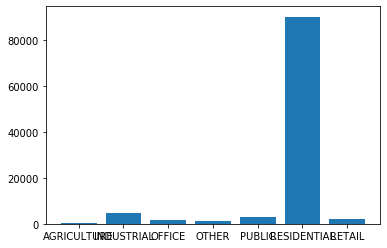

In [11]:
plt.bar(d.index, d.X)

Queremos equilibrar el número de instancias que tenemos para cada clase. Antes de probar con técnicas de "data augmentation", vamos a intentar eliminar de manera aleatoria unas cuantas instancias de la clase "RESIDENTIAL". Posteriormente comprobaremos si la muestra escogida es suficientemente representativa.

<BarContainer object of 7 artists>

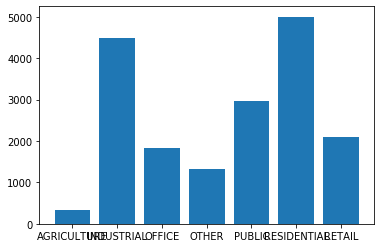

In [18]:
import random

# Datos de la clase "residential"
residential_data = data[data.CLASE=="RESIDENTIAL"]

# Escogemos 5000 índices de las instancias de manera aleatoria
residential_sample_indexes = random.sample(list(residential_data.index), 5000) 
residential_sample = residential_data.loc[residential_sample_indexes]

# Almacenamos los datos no escogidos por la muestra aleatoria
residential_not_in_sample = residential_data.drop(residential_sample_indexes)

# De los datos originales, eliminamos todos los residential
no_residential_data = data[data.CLASE!="RESIDENTIAL"]

# Unimos los datos no residential con la muestra aleatoria
data = no_residential_data.append(residential_sample)

# Distribucion de las clases en los datos
d = data[["X","CLASE"]].groupby("CLASE").count()
class_percentage = d/d["X"].sum()*100
plt.bar(d.index, d.X)

## Artificial Neural Network

Incluyendo las librerías necesarias

In [102]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

División de los datos en atributos y etiquetas. También se divide el data set en dos grupos: Train and Test.

In [152]:
# DATA

TRAIN_RATE = 0.8

n_instances = data.shape[0]

features = data.drop('CLASE', 1)
features = features.drop('ID', 1)
features= features.drop('CADASTRALQUALITYID', 1)

# SOFTMAX FOR THE OUTPUT
enc = OneHotEncoder(handle_unknown='ignore', sparse = False)
df_cls = data.CLASE.values.reshape(-1, 1)
labels = pd.DataFrame(enc.fit_transform(df_cls), columns = enc.categories_[0])


n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)

x_train = features.values[:n_train]
t_train = labels.values[:n_train]

x_dev = features.values[n_train:n_train+n_dev]
t_dev = labels.values[n_train:n_train+n_dev]

x_train = np.asarray(x_train)
t_train = np.asarray(t_train)
x_dev = np.asarray(x_dev)
t_dev = np.asarray(t_dev)

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (14445, 53)
t_train: (14445, 7)
x_dev: (1806, 53)
t_dev: (1806, 7)


### Initialization

In [154]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

In [155]:
x_train[0:1]

array([[2.26721084e+09, 1.65899063e+08, 1.09888730e-03, 4.54999338e+02,
        5.73005005e+02, 6.68002612e+02, 7.52999573e+02, 8.53000122e+02,
        1.00599916e+03, 1.20170168e+03, 1.44899910e+03, 1.83589395e+03,
        5.08226596e+03, 9.08119091e-06, 4.33000275e+02, 5.61000623e+02,
        6.40306604e+02, 7.12000574e+02, 7.91998413e+02, 9.03000171e+02,
        1.06099988e+03, 1.27099875e+03, 1.63401482e+03, 5.15956376e+03,
        2.80006943e+01, 2.68000031e+02, 3.23000159e+02, 3.75999643e+02,
        4.33000000e+02, 5.01000000e+02, 5.91002417e+02, 7.15999780e+02,
        8.58999988e+02, 1.01500012e+03, 2.04329100e+03, 7.61947548e-03,
        1.23900283e+03, 1.48599922e+03, 1.69799946e+03, 1.89100161e+03,
        2.07999988e+03, 2.28900044e+03, 2.54899927e+03, 2.96000503e+03,
        3.72489934e+03, 5.99745908e+03, 3.33617230e+02, 8.60098512e-01,
        4.62523993e-02, 5.57398066e-02, 1.20512249e+00, 1.99000000e+03,
        1.00000000e+00]])

### Hyperparameters

In [156]:
n_epochs = 600 # corresponding to about 20,000 iterations
learning_rate = 0.1
batch_size = 500
n_neurons_per_hlayer = [10000,10000, 10000] 

In [162]:
model = keras.Sequential()

In [163]:
model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

for neurons in n_neurons_per_hlayer:
    model.add(keras.layers.Dense(neurons, activation="relu"))

model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10000)             540000    
_________________________________________________________________
dense_33 (Dense)             (None, 10000)             100010000 
_________________________________________________________________
dense_34 (Dense)             (None, 10000)             100010000 
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 70007     
Total params: 200,630,007
Trainable params: 200,630,007
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=learning_rate),
              metrics=["categorical_accuracy"])

In [165]:
import time
start = time.clock()
history = model.fit(x_train, t_train, epochs=n_epochs, verbose=1, validation_data=(x_dev, t_dev))    
print (time.clock() - start)

C:\Users\jmlga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Train on 14445 samples, validate on 1806 samples
Epoch 1/600
 1632/14445 [==>...........................] - ETA: 10:21 - loss: nan - categorical_accuracy: 0.03 - ETA: 12:25 - loss: nan - categorical_accuracy: 0.04 - ETA: 11:50 - loss: nan - categorical_accuracy: 0.03 - ETA: 11:30 - loss: nan - categorical_accuracy: 0.03 - ETA: 11:12 - loss: nan - categorical_accuracy: 0.03 - ETA: 10:56 - loss: nan - categorical_accuracy: 0.02 - ETA: 10:59 - loss: nan - categorical_accuracy: 0.02 - ETA: 11:07 - loss: nan - categorical_accuracy: 0.01 - ETA: 11:17 - loss: nan - categorical_accuracy: 0.01 - ETA: 11:31 - loss: nan - categorical_accuracy: 0.01 - ETA: 11:35 - loss: nan - categorical_accuracy: 0.01 - ETA: 11:34 - loss: nan - categorical_accuracy: 0.01 - ETA: 11:40 - loss: nan - categorical_accuracy: 0.01 - ETA: 11:43 - loss: nan - categorical_accuracy: 0.02 - ETA: 11:45 - loss: nan - categorical_accuracy: 0.02 - ETA: 11:41 - loss: nan - categorical_accuracy: 0.01 - ETA: 11:41 - loss: nan - cat

KeyboardInterrupt: 